In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/home/azadkumar/Desktop/study/python/fashion-mnist_train.csv')
test_df = pd.read_csv('/home/azadkumar/Desktop/study/python/fashion-mnist_test.csv')

# visualisation

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape # 60000 image samples. 785 pixels

(60000, 785)

In [6]:
test_df.shape #10000 image samples

(10000, 785)

In [7]:
# create array( matrices) for training and testing data

In [8]:
training = np.array(train_df,dtype='float32')
testing = np.array(test_df,dtype = 'float32')

In [9]:
# visualise the matrix:

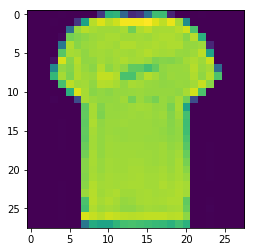

In [10]:
plt.imshow(training[10,1:].reshape(28,28)) #visualizing the row 10 of the training metrix. reshape is required to actuly make the arry into 28*28 format.

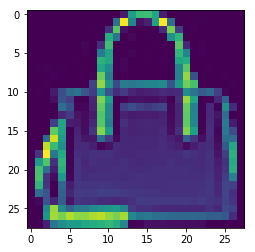

In [11]:
plt.imshow(training[11,1:].reshape(28,28)) # row 11 is a bag

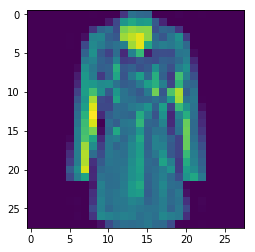

In [12]:
plt.imshow(training[6000,1:].reshape(28,28))

 8 is label


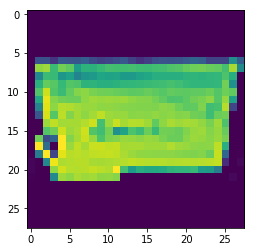

In [43]:
import random
i = random.randint(1,60000)
label =training[i,0]

plt.imshow(training[i,1:].reshape(28,28)) # randomly selecting the row number.

print('%2d is label' %label)

In [14]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


# view images in a grid formal.
#specify the dimensions

W_grid,L_grid =15,15 # width and length

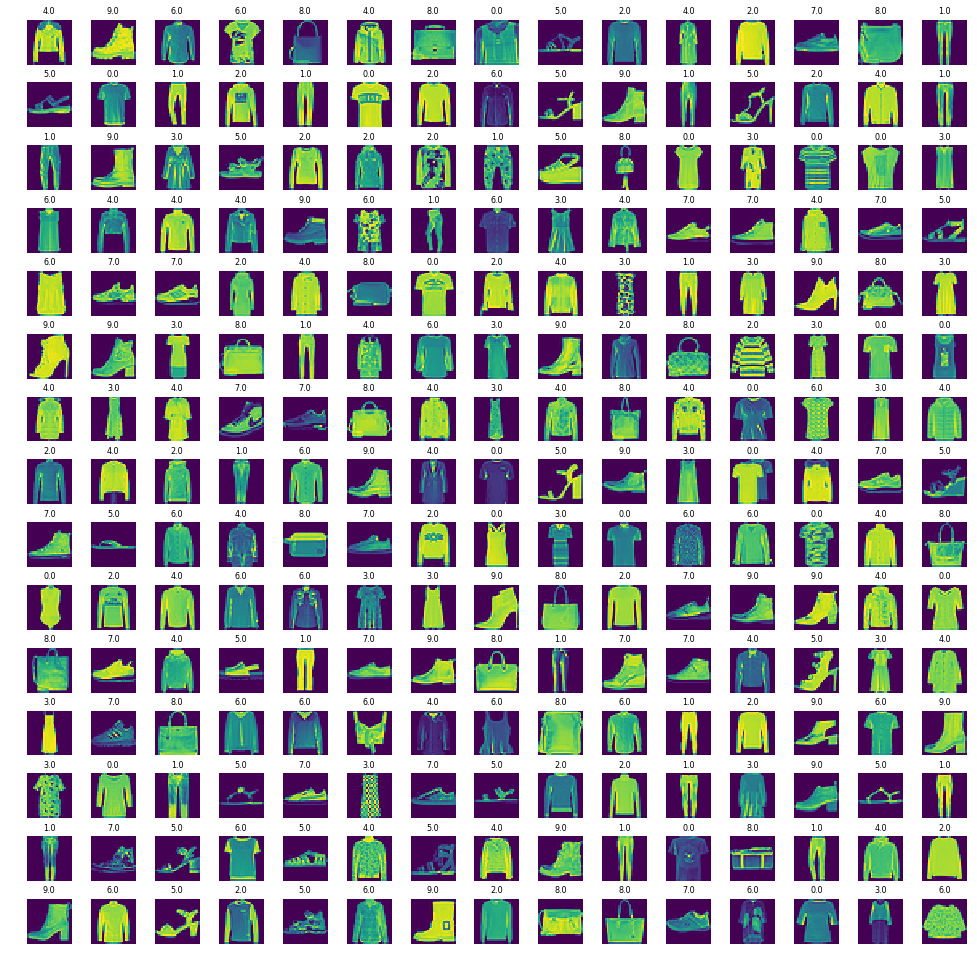

In [16]:
fig,axes = plt.subplots(W_grid,L_grid, figsize = (17,17))
#flatten the 15*15 matix into array of size 225
axes =axes.ravel()

length= len(training)

# select random number from 0 to length.
for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,length)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize= 8)
    axes[i].axis('off')
 

plt.subplots_adjust(hspace = 0.4)
    

# training the model

In [17]:
X_train = training[:,1:]/255
Y_train = training[:,0]

In [18]:
X_test = testing[:,1:]/255
Y_test = testing[:,0]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_validate,y_train,y_validate = train_test_split(X_train,Y_train,test_size =0.2,random_state = 5)

In [45]:
x_train = x_train.reshape(x_train.shape[0],*(28,28,1))
x_test = X_test.reshape(X_test.shape[0],*(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [22]:
x_train.shape

(48000, 28, 28, 1)

In [23]:
x_test.shape

(10000, 28, 28, 1)

In [24]:
x_validate.shape

(12000, 28, 28, 1)

In [25]:
#import tensorflow as tf

In [26]:
import keras

Using TensorFlow backend.


In [27]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import adam
from keras.callbacks import TensorBoard

In [28]:
cnn_model = Sequential()
#try 32 filters first and then 64
cnn_model.add(Conv2D(64,3,3,input_shape=(28,28,1),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/azadkumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/azadkumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  
/home/azadkumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  if __name__ == '__main__':


In [29]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=adam(lr=0.001),metrics =['accuracy'])

In [30]:
epochs = 50

history = cnn_model.fit(x_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (x_validate, y_validate))


Instructions for updating:
Use tf.cast instead.


/home/azadkumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.8705 - acc: 0.7031 - val_loss: 0.5497 - val_acc: 0.7992
Epoch 2/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.4527 - acc: 0.8394 - val_loss: 0.4198 - val_acc: 0.8513
Epoch 3/50
48000/48000 [==============================] - 53s 1ms/step - loss: 0.3937 - acc: 0.8617 - val_loss: 0.3868 - val_acc: 0.8644
Epoch 4/50
48000/48000 [==============================] - 51s 1ms/step - loss: 0.3606 - acc: 0.8745 - val_loss: 0.3705 - val_acc: 0.8689
Epoch 5/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3424 - acc: 0.8788 - val_loss: 0.3367 - val_acc: 0.8855
Epoch 6/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3229 - acc: 0.8871 - val_loss: 0.3305 - val_acc: 0.8842
Epoch 7/50
48000/48000 [==============================] - 49s 1ms/step - loss: 0.3093 - acc: 0.8913 - val_loss: 0.3316 - val_acc

In [37]:
evaluation = cnn_model.evaluate(x_test, Y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

predicted_classes = cnn_model.predict_classes(x_test)

10000/10000 [==============================] - 3s 252us/step
Test Accuracy : 0.917


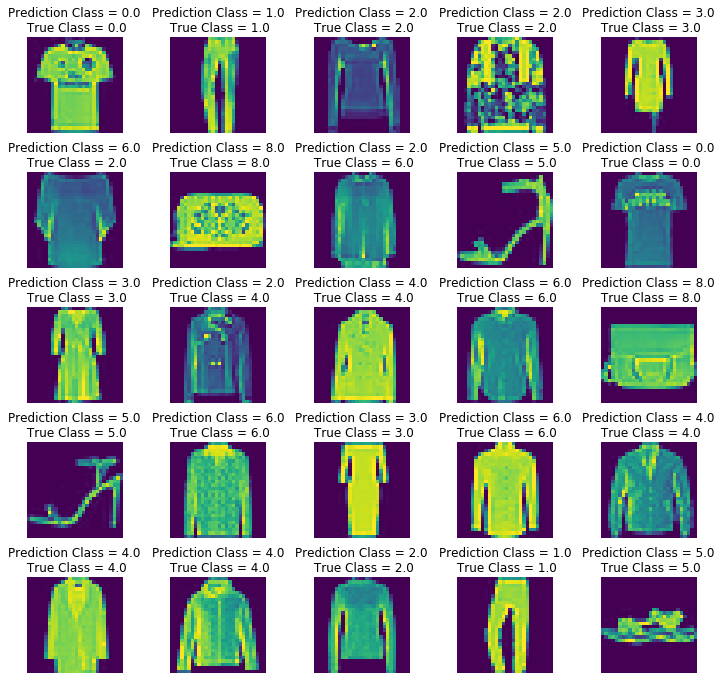

In [39]:
fig,axes = plt.subplots(5,5, figsize = (12,12))
#flatten the 15*15 matix into array of size 225
axes =axes.ravel()

length= len(training)

# select random number from 0 to length.
for i in np.arange(0,5*5):
    #index = np.random.randint(0,length)
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], Y_test[i]))
    axes[i].axis('off')
 

plt.subplots_adjust(wspace = 0.5)

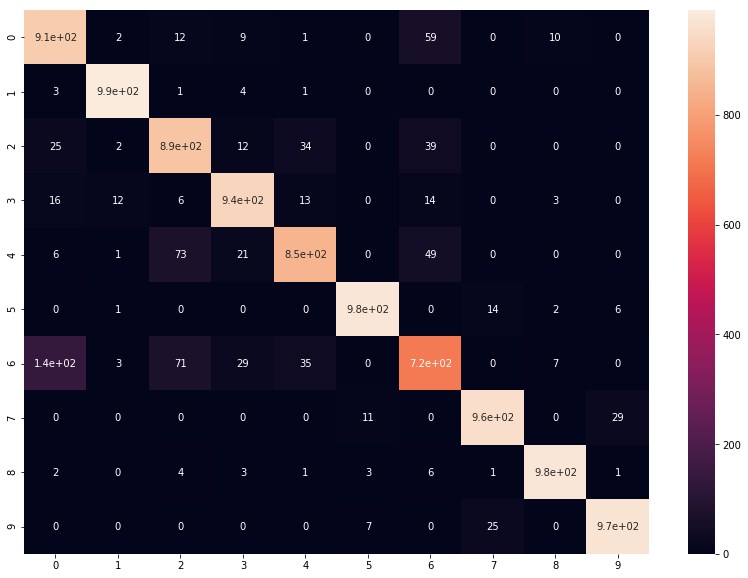

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [42]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(Y_test, predicted_classes, target_names = target_names))

             precision    recall  f1-score   support

    Class 0       0.83      0.91      0.86      1000
    Class 1       0.98      0.99      0.99      1000
    Class 2       0.84      0.89      0.86      1000
    Class 3       0.92      0.94      0.93      1000
    Class 4       0.91      0.85      0.88      1000
    Class 5       0.98      0.98      0.98      1000
    Class 6       0.81      0.72      0.76      1000
    Class 7       0.96      0.96      0.96      1000
    Class 8       0.98      0.98      0.98      1000
    Class 9       0.96      0.97      0.97      1000

avg / total       0.92      0.92      0.92     10000

